In [2]:
import json
import os
from web3 import Web3
import requests
import matplotlib.pyplot as plt 
from dotenv import load_dotenv
from CoinGeckoAPIWrapper import CoinGeckoAPIWrapper
from platform_utils import Plots

In [3]:
ADDRESSES_EOA = [
    "0xC6A8109D566D31758329452c626D473B7815380E", # PMG1
    "0xba42C2DfbB5e876EfD9dBd198DeD5DEB2beD68C5" # PMG2
    # add new ones
]

ADDRESSES_CONTRACTS = [
    "0x14052a178026665BB27fd0Be549f8FB8a88780d4"
]

In [4]:
def get_abi():
    with open((f"abi.json"), 'r') as f:
        json_file = f.read()
    
    result = json.loads(json_file)
    
    return result


In [5]:
load_dotenv()

True

In [6]:
def get_token_address(token_name):
    tokens = {
        "GNO": os.getenv("GNO_CONTRACT_ADDRESS"),
        "GEL": os.getenv("GEL_CONTRACT_ADDRESS"),
        "COW": os.getenv("COW_CONTRACT_ADDRESS"),
        "USDC": os.getenv("USDC_CONTRACT_ADDRESS"),
        "SWISE": os.getenv("SWISE_CONTRACT_ADDRESS"),
        "WBTC": os.getenv("WBTC_CONTRACT_ADDRESS")  
        # Add more tokens here
    } 
    return tokens.get(token_name,"token not found")

In [12]:
coinGecko = CoinGeckoAPIWrapper(os.getenv("API_KEY_COINGECKO"))

In [20]:
coinGecko.get_token_id("GEL")

'gelato'

In [19]:
(coinGecko.get_token_price("GEL"))

0.637824

In [21]:
class Portfolio():
    
    
    #RPC_CLIENT = "https://rpc.eth.gateway.fm" #dosta cesce puca
    RPC_CLIENT="https://cloudflare-eth.com/"
    
    
    tokens = ["GNO", "GEL", "COW", "USDC", "SWISE", "WBTC"]
    
    
    
    def __init__(self, ADDRESSES_EOA, ADDRESSES_CONTRACTS):#, #KRAKEN_KEY ):
        self.ADDRESSES_EOA = ADDRESSES_EOA
        self.ADDRESSES_CONTRACTS = ADDRESSES_CONTRACTS
        
        self.web3 = Web3(Web3.HTTPProvider(Portfolio.RPC_CLIENT))
        
        self.token_balances={}
        self.token_balances["ETH"]= self.get_onchain_eth_balance_total()
        for token in self.tokens:
              self.token_balances[token]=self.get_onchain_balance_total(name=token)
        
   
        self.token_values={}
        for token in ["ETH"] + self.tokens:
            print(type(coinGecko.get_token_price(name=token)))
            self.token_values[token]= self.token_balances[token]*coinGecko.get_token_price(name=token)

        self.portfolio_values = {}
        for address in self.ADDRESSES_EOA + self.ADDRESSES_CONTRACTS:
            self.portfolio_values[address] = (self.get_total_value_single_address(address))
            
            
        self.token_prices={}
        for token in ["ETH"] + self.tokens:
            self.token_prices[token]=coinGecko.get_token_price(name=token)

        #self.client = krakenex.API()
        #self.client.load_key(KRAKEN_KEY)
    
    @property
    def ADDRESSES(self):
        return self.ADDRESSES_EOA + self.ADDRESSES_CONTRACTS
    
    def get_onchain_eth_balance_single(self, address):
        return self.web3.eth.get_balance(address)/10**18
    
    def get_onchain_eth_balance_total(self):
        total = 0
        for address in self.ADDRESSES:
            total += self.get_onchain_eth_balance_single(address)
            
        return total
    
    
    
    
     #_-----------------za sve---------------------
    def get_onchain_balance_single(self, address, name):
        contract = self.web3.eth.contract(get_token_address(name), abi = get_abi())
        return contract.functions.balanceOf(address).call()/10**contract.functions.decimals().call()
    
    def get_onchain_balance_total(self, name):
        total = 0
        for address in self.ADDRESSES:
            total += self.get_onchain_balance_single(address,name)
            
        return total
    
    #---------------------------------------
    
    
    
    
    def get_total_value_single_address(self, address):
        total_price = 0
     
        eth_balance = self.get_onchain_eth_balance_single(address)
        eth_price = coinGecko.get_token_price("ETH")
        eth_value = eth_balance * eth_price
        total_price += eth_value
        
        for token in self.tokens:
            balance = self.get_onchain_balance_single(address, token)
            price = coinGecko.get_token_price(token)
            price_single_token = price * balance
            total_price += price_single_token
        
        return total_price
    
    def get_total_value_portfolio(self):
        total = 0
        for address in self.ADDRESSES:
            total += self.get_total_value_single_address(address)
        return total
    
        
   

In [22]:
p = Portfolio(ADDRESSES_EOA, ADDRESSES_CONTRACTS)

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>


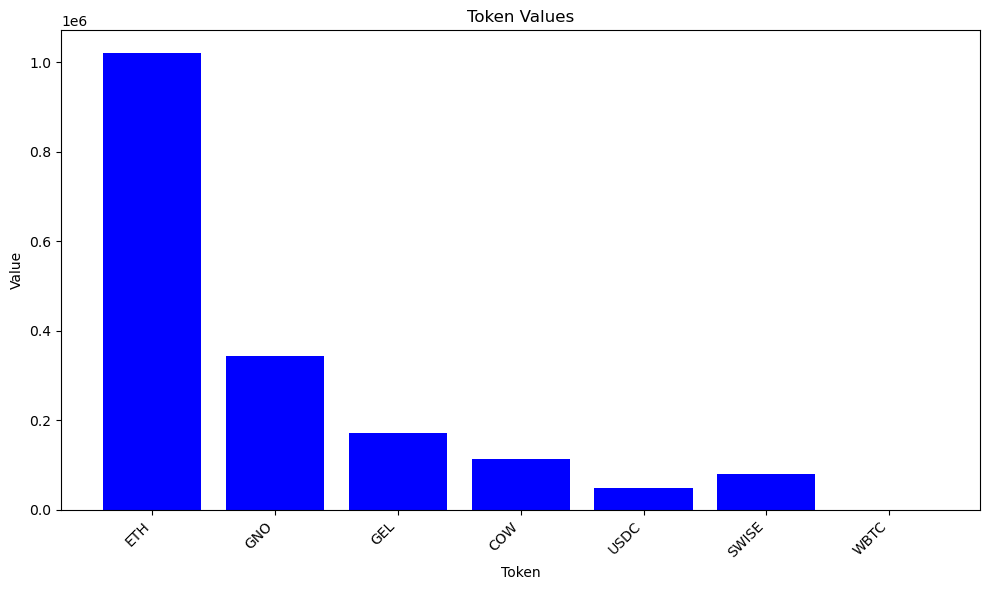

In [31]:
Plots.plot_token_values(p.token_values)

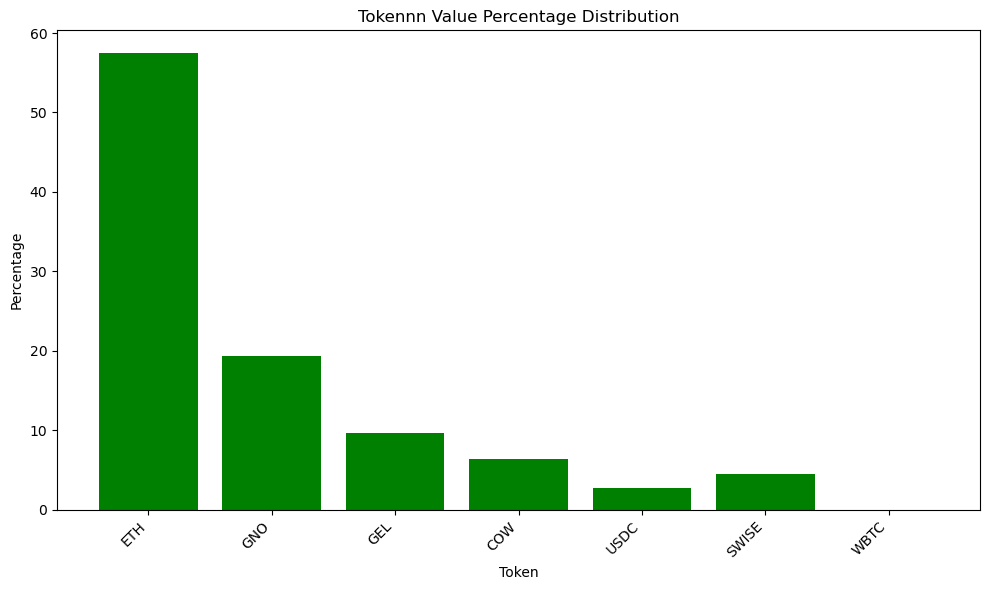

In [32]:
Plots.plot_token_value_percentage(p.token_values)

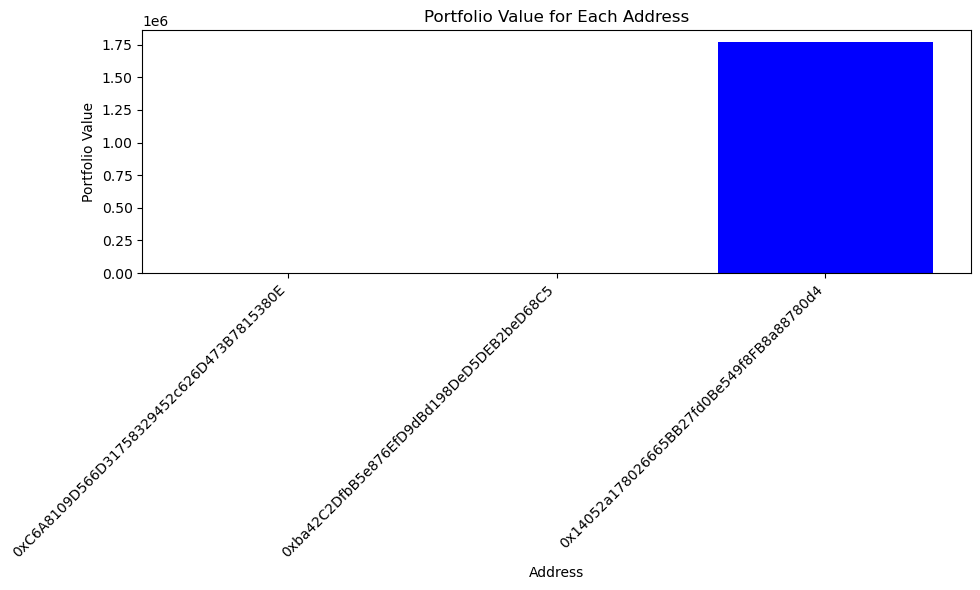

In [33]:
Plots.plot_address_portfolio_values(p.portfolio_values)

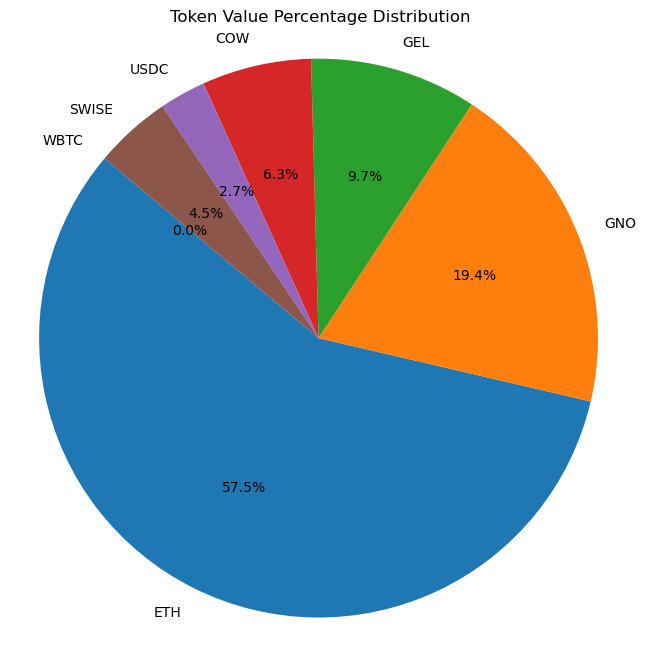

In [34]:
Plots.plot_token_value_percentage_as_pie(p.token_values)

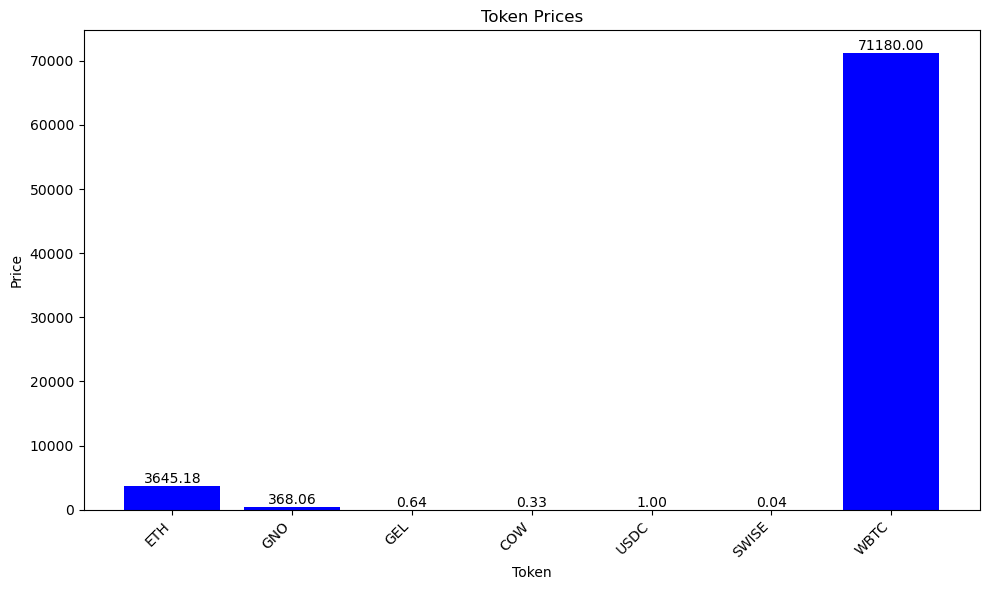

In [35]:
Plots.plot_token_prices(p.token_prices)

In [191]:
# need to add get wbtc balance